# AIML assignment-1,to implement the KNN algorithm for varring n values and check for accuracy count for the "IRIS FLOWER DATASET"

In [22]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import accuracy_score


#loading the dataset 

df=pd.read_csv("IRIS.csv")

#top 5 entries
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
#bottom 5 entries
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.shape

(150, 5)

In [26]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [28]:
data = df.drop_duplicates(subset ="species",)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [29]:
df.value_counts("species")

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

C:\Users\whynew\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


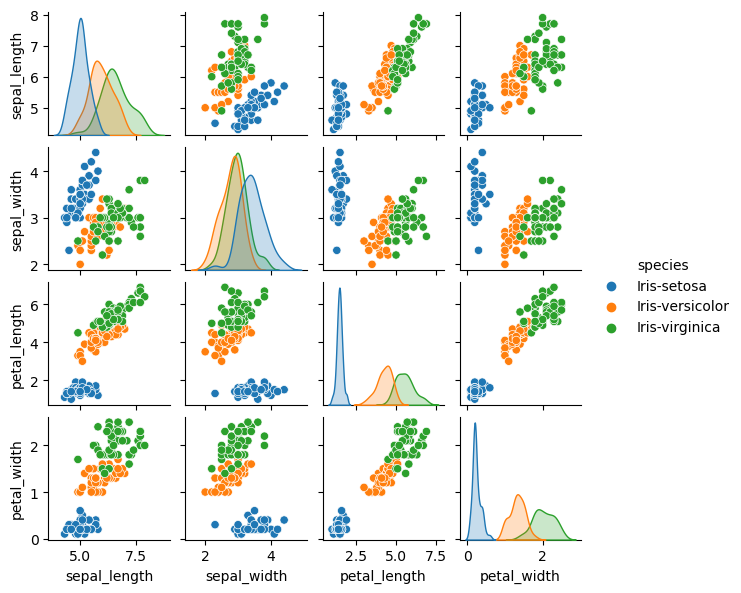

In [30]:
sbn.pairplot(df,hue='species', height=1.5)

# Splitting the columns of dataset into attributes and target value then soring it in variables x & y reapectively

In [31]:
x = df.drop('species',axis=1)
y = df['species']

In [32]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

# Splitting the dataset into test data & training data

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [36]:
y_train

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: species, Length: 120, dtype: object

 # Loading the KNN algorithm to a variable and training the model with training dataset

In [37]:
knn = knc(n_neighbors=2)

In [38]:
results = pd.DataFrame(columns=['k', 'accuracy'])

for k in range(1,35,3):
    
    knn = knc(n_neighbors=k)
    
    # Train the model
    knn.fit(x_train, y_train)
    
     # Make predictions on the test set
    ypred = knn.predict(x_test)
    
    # Calculate accuracy and store the results
    accuracy = accuracy_score(y_test, ypred)
    results.loc[len(results)] = [k, accuracy]
    
print(results)
    

       k  accuracy
0    1.0  1.000000
1    4.0  1.000000
2    7.0  0.966667
3   10.0  1.000000
4   13.0  1.000000
5   16.0  1.000000
6   19.0  1.000000
7   22.0  1.000000
8   25.0  1.000000
9   28.0  1.000000
10  31.0  1.000000
11  34.0  1.000000


# Plotting for the accuracy count of various K-values

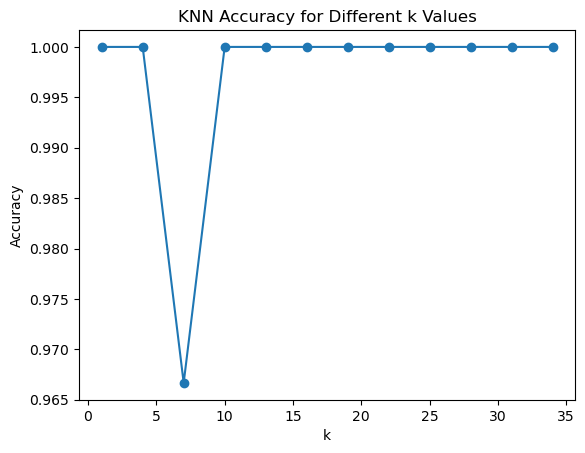

In [39]:
plt.plot(results['k'], results['accuracy'], marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# Implementing Logistic regression algorithm

In [40]:
from sklearn.linear_model import LogisticRegression

# Create and fit the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(x_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 1.0000


# Implementing Support Vector Machine algorithm

In [41]:
from sklearn.svm import SVC

# Create and fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(x_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Support Vector Machine Accuracy: {accuracy:.4f}')

Support Vector Machine Accuracy: 1.0000


#  Implementing Decision tree algorithm

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(x_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')


Decision Tree Accuracy: 1.0000


#  Implementing Random forest algorithm

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(x_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.4f}')


Random Forest Accuracy: 1.0000
